Can I animate a spinning pceb?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from matplotlib import animation
import mplcyberpunk



#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
#cc cet
m1 = 0.441*u.Msun
m2 = 0.18*u.Msun
p= 6.8818*u.hr
r1 = 0.0179*u.Rsun
r2 = 0.243*u.Rsun

In [3]:
def p_to_a(m1, m2, p):
    m1, m2, p = m1.to(u.kg), m2.to(u.kg), p.to(u.s)
    a = ((const.G*(m1+m2) * p**2)/(4*np.pi**2))**(1/3)
    return a

a = p_to_a(m1, m2, p)
a = a.to(u.Rsun)
print(a) #yay right answer

def com(m1, m2, a): #find the distances to a COM
    r1 = a / (1 + (m1/m2))
    r2 = a - r1
    return r1, r2

a1, a2 = com(m1, m2, a)
print(a1, a2)

a1, a2 = a1.value, a2.value

1.5612131270208132 solRad
0.4525255440640038 solRad 1.1086875829568092 solRad


https://stackoverflow.com/questions/51286455/how-can-i-animate-a-point-moving-around-the-circumference-of-a-circle

In [4]:
"""
r_1 = r1.value # radius of circle
r_2 = r2.value
def circle1(phi):
    return np.array([r_1*np.cos(phi), r_1*np.sin(phi)])

def circle2(phi):
    return np.array([r_2*np.cos(phi), r_2*np.sin(phi)])

# create a figure with an axes
fig, ax = plt.subplots(figsize=(5,5))
# set the axes limits
ax.axis([-1.5,1.5,-1.5,1.5])
# set equal aspect such that the circle is not shown as ellipse
ax.set_aspect("equal")
# create a point in the axes
#point1, = ax.plot(0,1, marker="o", ms=5)
point1 = plt.Circle((0,1), radius=0.5)

# point2, = ax.plot(0,1, marker="o",ms=10)

# Updating function, to be repeatedly called by the animation
def update(phi):
    # obtain point coordinates 
    x1,y1 = circle1(phi)
    x2,y2 = circle2(phi+np.pi)
    # set point's coordinates
    point1.set_x=(x1)
    point1.set_y=(y1)
    
#     point2.set_data([x2],[y2])
    return point1#, point2

# create animation with 10ms interval, which is repeated,
# provide the full circle (0,2pi) as parameters
#anim = FuncAnimation(fig, update, interval=1, blit=True, repeat=True, frames=np.linspace(0,2*np.pi,2, endpoint=False))

#anim.save('animations/test_circle.gif', dpi=100, writer='imagemagick')
#plt.show()"""

'\nr_1 = r1.value # radius of circle\nr_2 = r2.value\ndef circle1(phi):\n    return np.array([r_1*np.cos(phi), r_1*np.sin(phi)])\n\ndef circle2(phi):\n    return np.array([r_2*np.cos(phi), r_2*np.sin(phi)])\n\n# create a figure with an axes\nfig, ax = plt.subplots(figsize=(5,5))\n# set the axes limits\nax.axis([-1.5,1.5,-1.5,1.5])\n# set equal aspect such that the circle is not shown as ellipse\nax.set_aspect("equal")\n# create a point in the axes\n#point1, = ax.plot(0,1, marker="o", ms=5)\npoint1 = plt.Circle((0,1), radius=0.5)\n\n# point2, = ax.plot(0,1, marker="o",ms=10)\n\n# Updating function, to be repeatedly called by the animation\ndef update(phi):\n    # obtain point coordinates \n    x1,y1 = circle1(phi)\n    x2,y2 = circle2(phi+np.pi)\n    # set point\'s coordinates\n    point1.set_x=(x1)\n    point1.set_y=(y1)\n    \n#     point2.set_data([x2],[y2])\n    return point1#, point2\n\n# create animation with 10ms interval, which is repeated,\n# provide the full circle (0,2pi) as 

Didn't work, this looks more promising https://nickcharlton.net/posts/drawing-animating-shapes-matplotlib.html

In [5]:
#stars https://github.com/jamescalam/python_synthwave
def make_stars(min_x, max_x, min_y, max_y, stars=100):
    y = np.random.uniform(min_y, max_y, stars)
    x = np.random.uniform(min_x, max_x, stars)
    alpha_multiplier = np.random.uniform(.5, 1, len(x))
    size = np.random.uniform(1, 6, len(x))

    return np.array([x, y, alpha_multiplier, size]).T

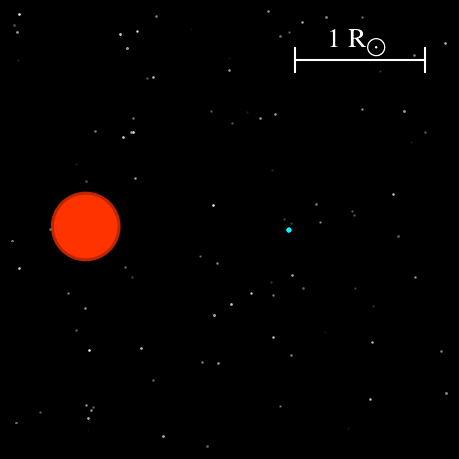

In [16]:
#plt.style.use("cyberpunk")
#rcParams["axes.linewidth"]=1

fig = plt.figure(figsize=(5, 5))
fig.set_dpi(100)
fig.set_tight_layout(True)

#fig.set_size_inches(7, 6.5)
plot_rad = 1.69
ax = plt.axes(xlim=(-plot_rad, plot_rad), ylim=(-plot_rad, plot_rad))

ax.set_aspect("equal")
patch1 = plt.Circle((0, a1), r1.value, fc='#08F7FE')
patch2 = plt.Circle((0, a2), r2.value, fc='#ff3300')

patch1a = plt.Circle((0, a1), r1.value*1.1, fc='#08F7FE', alpha=0.5)
patch2a = plt.Circle((0, a2), r2.value*1.1, fc='#ff3300',alpha=0.5)

def init():
    patch1.center = (0, a1)
    patch2.center = (0, -a2)
    patch1a.center = (0, a1)
    patch2a.center = (0, -a2)
    ax.add_patch(patch1)
    ax.add_patch(patch2)
    ax.add_patch(patch1a)
    ax.add_patch(patch2a)
    return patch1, patch2, patch1a, patch2a

def animate(phi):
    x, y = patch1.center
    x, y = a1* np.cos(phi), a1*np.sin(phi)
    patch1.center = (x, y)
    patch1a.center = (x, y)
    x, y = patch2.center
    x, y = a2* np.cos(phi+np.pi), a2*np.sin(phi+np.pi)
    patch2.center = (x, y)
    patch2a.center = (x, y)
    
    
    return patch1, patch2, patch1a, patch2a

anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               frames=np.linspace(0,2*np.pi, 360, endpoint=False), 
                               interval=20,
                               blit=True)

col= '#000033'
bgcol ='#000033'
col='k'
bgcol='k'
fig.patch.set_facecolor(bgcol)
ax.set_facecolor(bgcol)
ax.spines['bottom'].set_color(col)
ax.spines['top'].set_color(col) 
ax.spines['right'].set_color(col)
ax.spines['left'].set_color(col)
#plt.grid(zorder=-10)
# plt.xlabel(r'X (R$_{\bigodot}$)')
# plt.ylabel(r'Y (R$_{\bigodot}$)')
plt.xticks(visible=False)
plt.yticks(visible=False)

labely = 1.3
labelx= 0.5
plt.errorbar((labelx, labelx+1), (labely, labely), yerr=0.1, c='w')
plt.annotate(r'1 R$_{\bigodot}$', (labelx+0.5, labely+0.1), ha='center', c='w')

stars = make_stars(-plot_rad, plot_rad, -plot_rad, plot_rad)
for star in stars:
        alpha = np.random.uniform(0, 1)
        ax.scatter(star[0], star[1], s=star[2], alpha=alpha,
                   c='#ffffff', zorder=0)
        dark = np.random.uniform(0, .3)
        ax.scatter(star[0], star[1], s=star[2], alpha=dark,
                   c='#000000', zorder=0)

# anim.save('animations/test_circle.gif', dpi=100, writer='imagemagick')
plt.show()

#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

#anim.save('animations/test2.mp4', writer=writer)
